<a href="https://colab.research.google.com/github/shamrosewebdev/AI_ML_ENGINEER_INTERNSHIP/blob/main/Predict_Future_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Importing libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [44]:
# Loading dataset

ticker='AAPL'

df=yf.download(ticker,start='2018-01-01',end='2025-01-01')

df.head()

/tmp/ipython-input-468668973.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start='2018-01-01',end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341877,40.351247,39.639302,39.850076,102223600
2018-01-03,40.334854,40.878181,40.271625,40.405112,118071600
2018-01-04,40.522221,40.625266,40.299739,40.407465,89738400
2018-01-05,40.983582,41.070231,40.526908,40.618243,94640000
2018-01-08,40.831356,41.126437,40.732992,40.831356,82271200


In [45]:
# Data shape

df.shape

(1761, 5)

In [46]:
#Understanding the dataset

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2018-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1761 non-null   float64
 1   (High, AAPL)    1761 non-null   float64
 2   (Low, AAPL)     1761 non-null   float64
 3   (Open, AAPL)    1761 non-null   float64
 4   (Volume, AAPL)  1761 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 82.5 KB


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,121.850362,123.058896,120.504842,121.728624,1.001417e+08
std,59.118359,59.588056,58.556407,59.046660,5.521309e+07
min,33.799679,34.638787,33.754514,34.225174,2.323470e+07
25%,54.094204,54.796504,53.708096,54.279317,6.309290e+07
50%,131.427261,132.914782,130.062945,131.890277,8.671200e+07
75%,168.652115,170.209426,167.215933,168.464852,1.214346e+08
max,257.853790,258.928945,256.470064,257.027541,4.265100e+08


In [47]:
# Create target
df['target_closing'] = df['Close'].shift(-1)

# REMOVE NaN row created by shift
df = df.dropna()

# Features & target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['target_closing']

In [48]:
# Creating train test split

X=df[['Open','High','Low','Volume']]
y=df[['target_closing']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)


In [49]:
# Training the model

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
# Testing the model
y_pred=model.predict(X_test)

In [52]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 2.16080506337287
RMSE: 2.8760919615904363


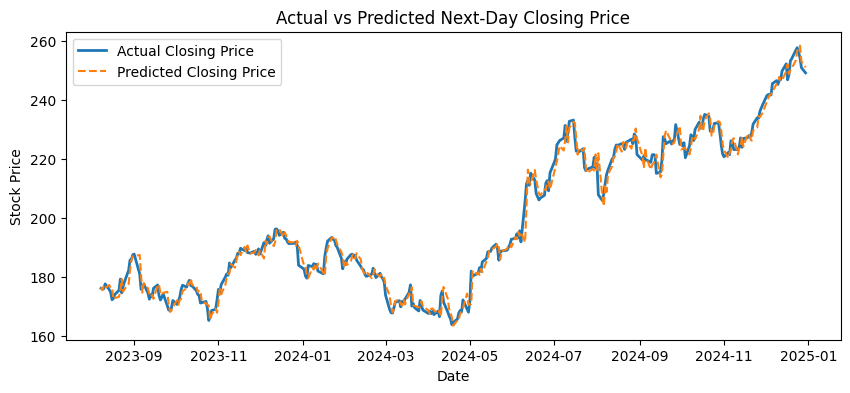

In [54]:
plt.figure(figsize=(10, 4))

plt.plot(y_test.index, y_test, label="Actual Closing Price", linewidth=2)
plt.plot(y_test.index, y_pred, label="Predicted Closing Price", linestyle="--")

plt.title("Actual vs Predicted Next-Day Closing Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
